### Least-squares filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork
from sclibrary.plot import SCPlot
import numpy as np


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


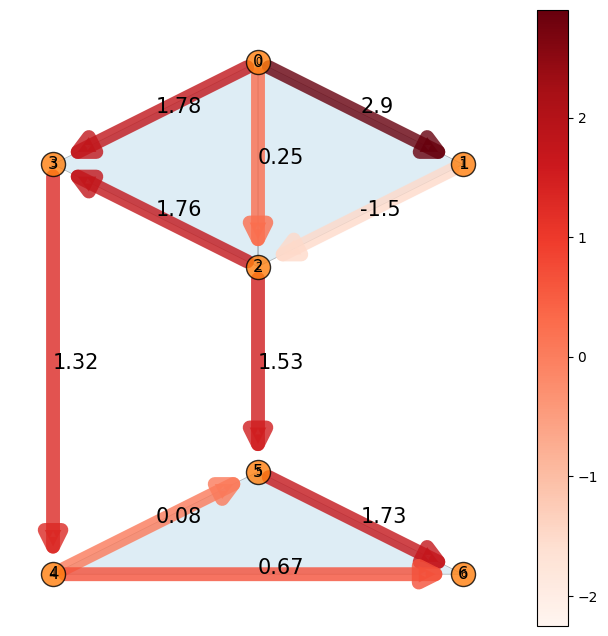

In [3]:
from sclibrary.ls_filter_design import LSFilterDesign

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

scplot.draw_flow(flow=f)

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Simplical filter form, L1 = L2 = L and α = β

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Error: 0.3995924743780617


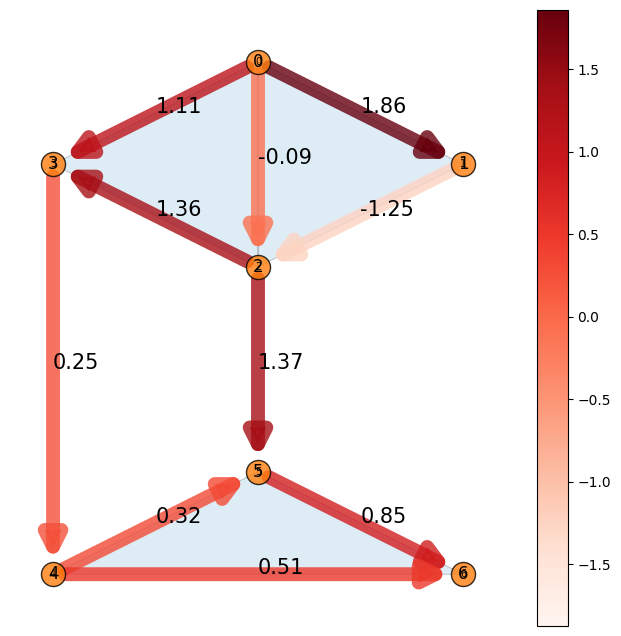

In [4]:
filter_size = 4

# gradient
lsfilter.simplicial_filter(
    L=filter_size, component="gradient", f=f, 
)

print("Error:", lsfilter.history["error"])
f_estimated = lsfilter.history["f_estimated"]

scplot.draw_flow(np.round(f_estimated, 2))

In [5]:
lsfilter.history["error_per_filter_size"]

[array([0.42504829, 0.41523367, 0.41904809, 0.4118319 ])]

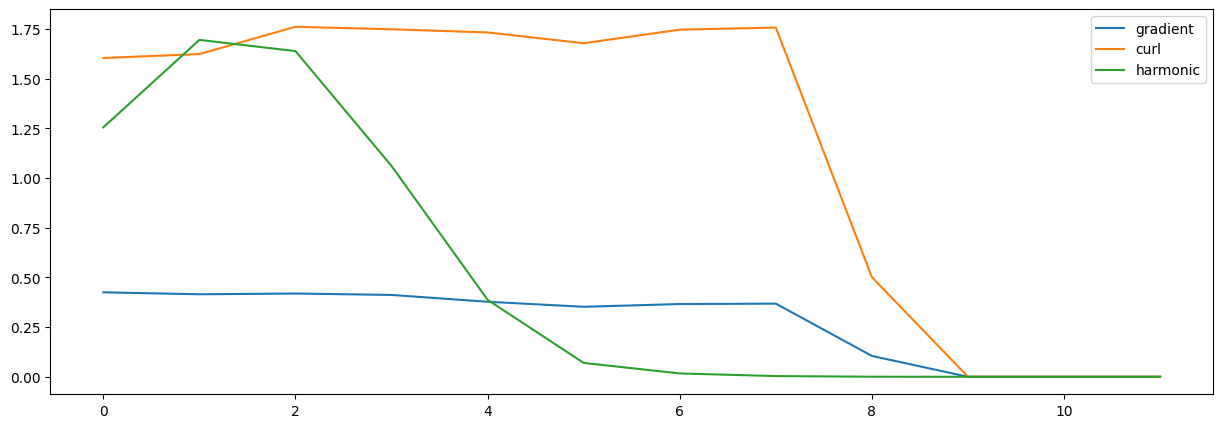

In [7]:
import matplotlib.pyplot as plt

filter_size = 12
plt.figure(figsize=(15, 5))

# gradient
lsfilter.simplicial_filter(
    L=filter_size, component="gradient", f=f
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"][0], label="gradient")

# curl
lsfilter.simplicial_filter(
    L=filter_size, component="curl", f=f
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"][0], label="curl")

# harmonic 
lsfilter.simplicial_filter(
    L=filter_size, component="harmonic", f=f
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"][0], label="harmonic")

plt.legend()

#### Subcomponent extraction

Error: 0.2398863093936533


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


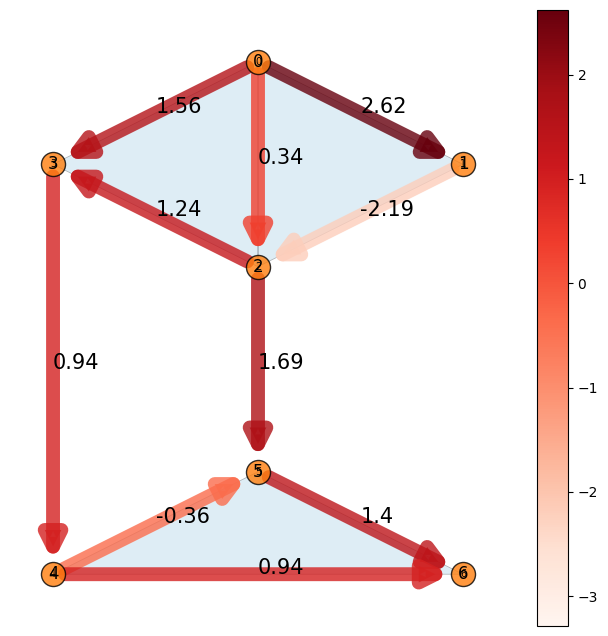

In [17]:
filter_range = 4

lsfilter.subcomponent_extraction(
    L=filter_range, component="gradient", f=f
)
print("Error:", lsfilter.history["error"])
f_estimated = lsfilter.history["f_estimated"]
scplot.draw_flow(np.round(f_estimated, 2))

#### General Filter, L1 != L2 and α != β

Error: 8.990165718164929e-17


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


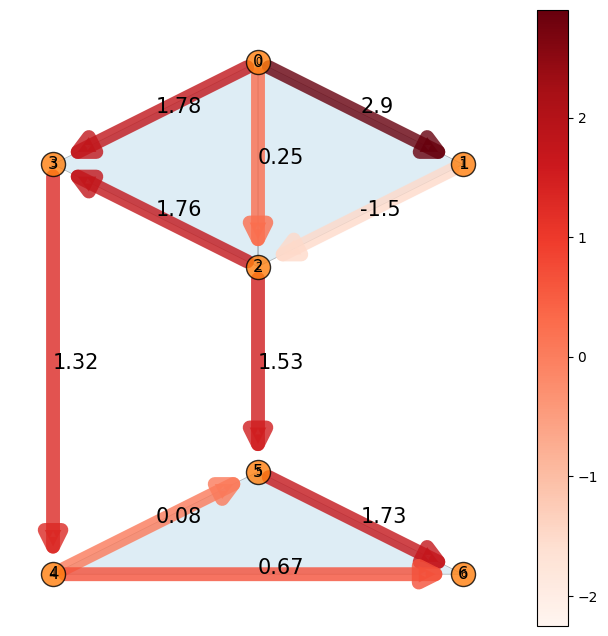

In [19]:
lsfilter = LSFilterDesign(simplicial_complex=sc)
lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

print("Error:", lsfilter.history["error"])
f_estimated = lsfilter.history["f_estimated"]

scplot.draw_flow(np.round(f_estimated, 2))